In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [31]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [32]:
X_train.shape

(60000, 28, 28)

5


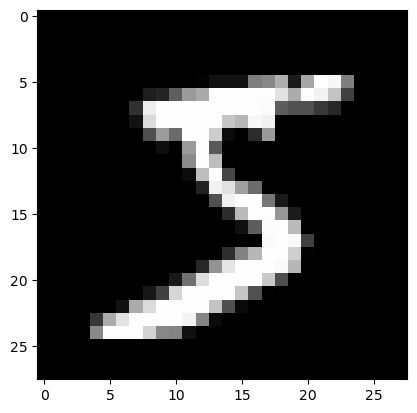

In [33]:
X_train[0]

plt.imshow(X_train[0], "gray")

print(y_train[0])

In [34]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28 )

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape


(60000, 784)

In [35]:
mdl = keras.Sequential()

mdl.add(layers.Dense(256, activation = "relu", input_shape = (X_train.shape[1],)))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8960 - loss: 0.3586
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0828
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9817 - loss: 0.0541
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9868 - loss: 0.0408
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9907 - loss: 0.0284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9909 - loss: 0.0276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9928 - loss: 0.0213
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0176
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9940 - loss: 0.0193
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0120


In [36]:
mdl.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.1231


[0.10606717318296432, 0.9761000275611877]

In [37]:
# Predict labels for the test data using the machine learning model
ypred = mdl.predict(X_test)

# Extract the predicted labels from the predicted probabilities
ypred_label = np.argmax(ypred, axis=1)

# Display the predicted labels
ypred_label

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

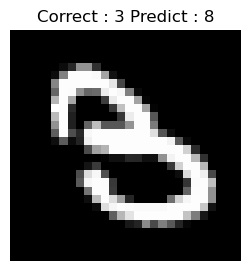

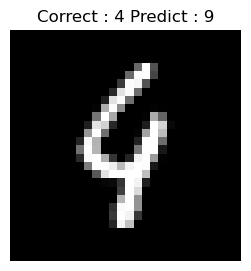

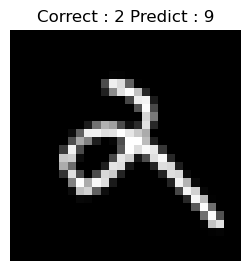

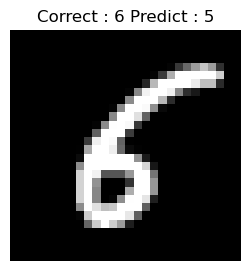

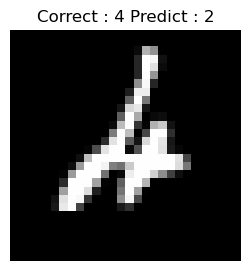

In [38]:
wrong_predict = y_test != ypred_label
# Loop through the first 5 wrong predictions
 # Set up a figure for displaying images
for k in range(5):
     # Create a subplot for each sample
    plt.figure(figsize = (8, 3))
    plt.subplot(1, 2, 1)
    # Display the image of the wrongly predicted sample
    plt.imshow(X_test[wrong_predict][k].reshape(28,28), "gray")
    
    # Set the title of the subplot showing correct and predicted labels
    plt.title(f"Correct : {y_test[wrong_predict][k]} Predict : {ypred_label[wrong_predict][k]}")
    
    # Turn off axis for better visualization
    plt.axis("off") 

plt.show()